# **CREDIT CARD APPROVAL**


## **Introduction:**
> Credit cards are widely used, but getting one can be tough based on factors like income and job status. To make it easier, we will use machine learning to predict approvals, exploring how different factors impact this.Machine learning helps us uncover hidden connections between different details, making our predictions smarter.



### **The Crucial Role of Predictive Customer Selection:**

Nowadays, people use credit cards a lot because they're handy for buying things without carrying cash. So, knowing who gets a credit card is super important. Banks need to be smart about picking the right people to give credit cards to. This helps them avoid problems like people not paying back the money. By leveraging sophisticated technology, banks can identify individuals who are likely to manage their credit card payments responsibly. This helps them select people who handle credit well. It's like making sure things work out well for both the bank and the person who gets the card.

###**Machine Learning's Impact on Banking:Transforming How Credit Cards Are Approved and Boosting Profits:**
Using machine learning to predict credit card approval makes banking faster and better. It helps banks quickly approve credit cards, making customers happy and wanting to stick around. Machine learning also helps banks know who might find it hard to pay. So, banks can give better deals, This not only makes things safer but also helps the bank make more money. With things going easier and less risky, banks can offer better deals, get more customers, and make more money.

### **Fixing Credit Card Approval Gaps: How Machine Learning Helps Indian Banks and Future Needs:**

When banks are unsure about approving credit cards, carefully examining customer information using machine learning helps them make smarter and more effective decisions in the approval process. However, for this to succeed, the bank requires good and complete data. Including additional details like spending patterns, financial behavior, and transaction history further improves the bank's understanding of credit card approval, providing valuable insights for better decision-making and risk assessment

## **Aim:**
>The main of this project is to make a system that figures out
if someone is a good or not-so-good match for a credit card. We are also dealing with the challenge of uneven information in the credit scoring process.



# **Information regarding the datasets**

In our credit card approval project, we have two sets of data: one for whether a card is approved or not, and the other for all other details. This helps us study the features that influence approval decisions more effectively.


In [3718]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**The dataset includes all the features required for the credit card approval analysis.**

In [3719]:
data = pd.read_csv("/content/Credit_card.csv")
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


**The credit card dataset includes a label column indicating whether a card was approved or not, serving as the target variable that guides the project focus.**




*   Label 0 represents approved credit card applications.
*   Label 1 corresponds to credit card applications that were not approved.




In [3720]:
data1 = pd.read_csv("/content/Credit_card_label.csv")
data1

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


**Combining the datasets, which means merging the information on approval labels (0 and 1) with the features for a comprehensive credit card analysis**

### **HEAD()**
*   Checking the first few rows of the merged dataset with head() for a quick look at combined approval labels and features

In [3721]:
df = data.merge(data1,on = "Ind_ID",how = "left")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### **TAIL()**
*  Reviewing the last few rows of the merged dataset using tail() to see the combined approval labels and features.

In [3722]:
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


### **Reviewing all the column names in the dataset for a complete overview.**

In [3723]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

### **Simplifying our analysis by renaming columns for clarity.**

In [3724]:
df.rename(columns = {"GENDER" : "Gender" , "CHILDREN" : "Children" ,"Type_Income" : "Income_type" , "EDUCATION" : "Education",
                     "Car_Owner" : "Car_owner" ,"Propert_Owner" : "Property_owner","Type_Occupation" : "Occupation_type",
                     "EMAIL_ID" : "Email_Id"},inplace = True)

### **Verifying the dataset size by checking the number of rows and columns.**

In [3725]:
print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Number of rows : 1548
Number of columns : 19


### **INFO()**
* Presenting a quick dataset summary with info(), highlighting entries, data types, and memory usage.




In [3726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_owner        1548 non-null   object 
 3   Property_owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Income_type      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_Id         1548 non-null   int64  
 16  Occupation_type  1060 non-null   object 
 17  Family_Members

### **ISNULL()**
* Using isnull() to identify and present the presence of missing values in the dataset.





In [3727]:
df.isnull().sum()

Ind_ID               0
Gender               7
Car_owner            0
Property_owner       0
Children             0
Annual_income       23
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_Id             0
Occupation_type    488
Family_Members       0
label                0
dtype: int64

### **DESCRIBE()**
* Summarizes key statistics of numerical features in the dataset.



In [3728]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
Children,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
Annual_income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.00,1575000.0
Birthday_count,1526.0,-1.604034e+04,4229.503202,-24946.0,-19553.00,-15661.5,-12417.00,-7705.0
Employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
Mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
Work_Phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
Phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
Email_Id,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
Family_Members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


### **PERCENTAGE CALCULATION OF MISSING VALUES**
* Calculating and displaying the percentage of missing values in each column





In [3729]:
df.isnull().sum()/df.shape[0]*100

Ind_ID              0.000000
Gender              0.452196
Car_owner           0.000000
Property_owner      0.000000
Children            0.000000
Annual_income       1.485788
Income_type         0.000000
Education           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
Email_Id            0.000000
Occupation_type    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

### **DUPLICATES**
* Identifying duplicate rows in the dataset

In [3730]:

df.duplicated().sum()

0

### **CATEGORICAL VALUE COUNTS**

In [3731]:
for i in df.select_dtypes(include = "object").columns :
   print(df[i].value_counts())
   print("***" * 10)

F    973
M    568
Name: Gender, dtype: int64
******************************
N    924
Y    624
Name: Car_owner, dtype: int64
******************************
Y    1010
N     538
Name: Property_owner, dtype: int64
******************************
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Income_type, dtype: int64
******************************
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64
******************************
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64
******************************
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apa

#**EDA (Exploratory Data Analysis)**
 *  Conducting EDA to gain insights into the dataset's characteristics, patterns, and distributions through statistical and visual exploration.




### **1.Histograms for numerical features:**

Creating histogram plots for all the numerical columns in the datset.


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

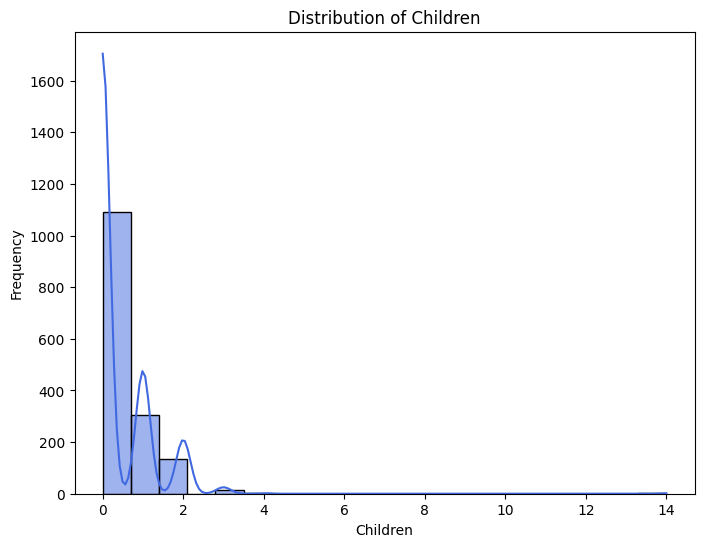

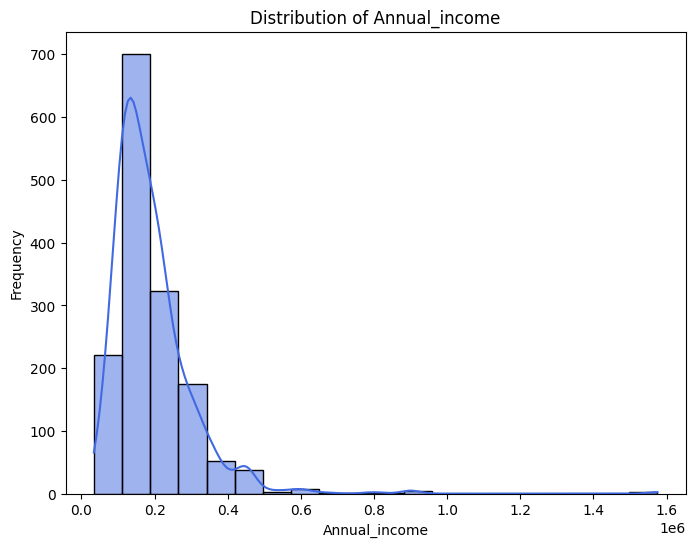

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

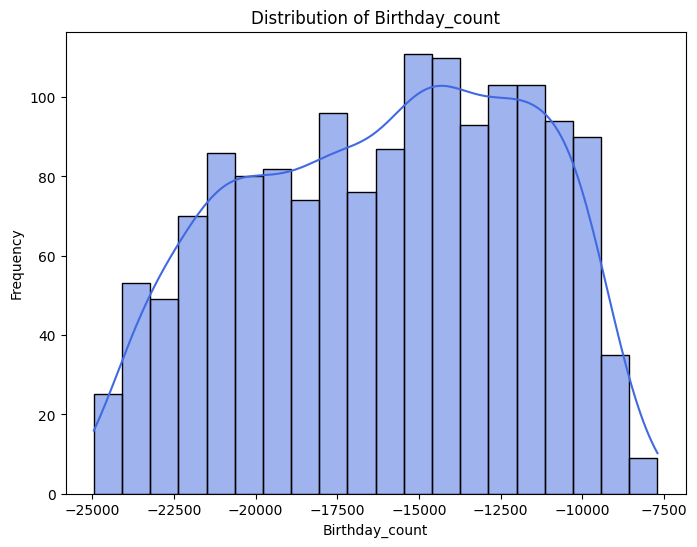

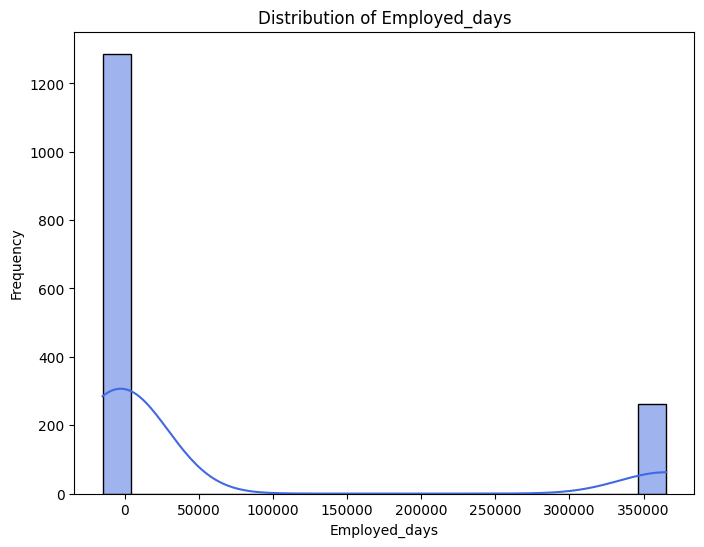

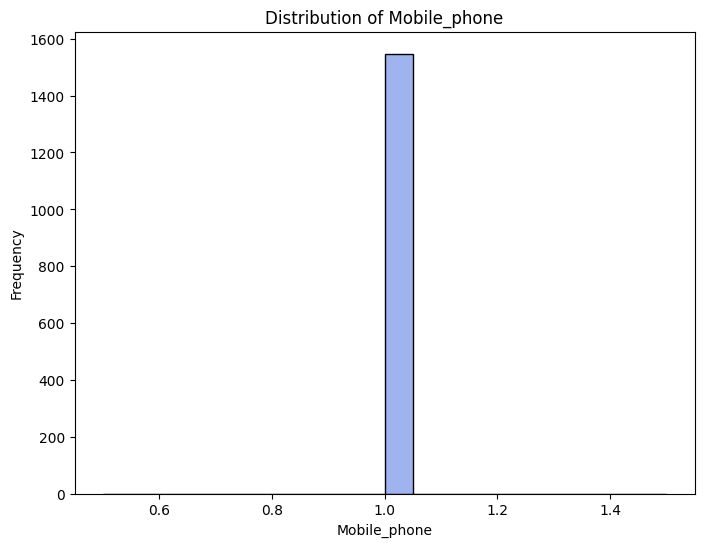

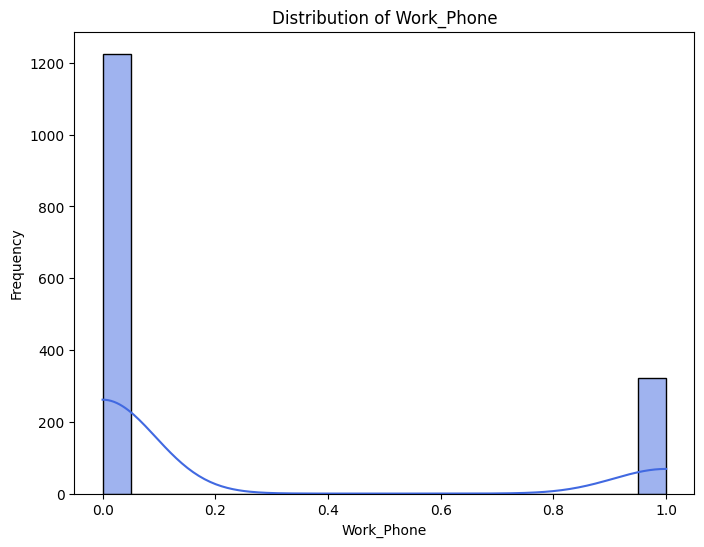

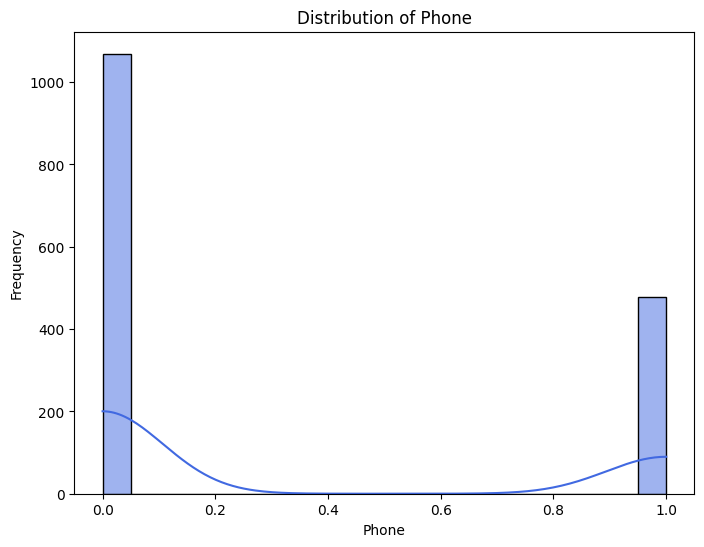

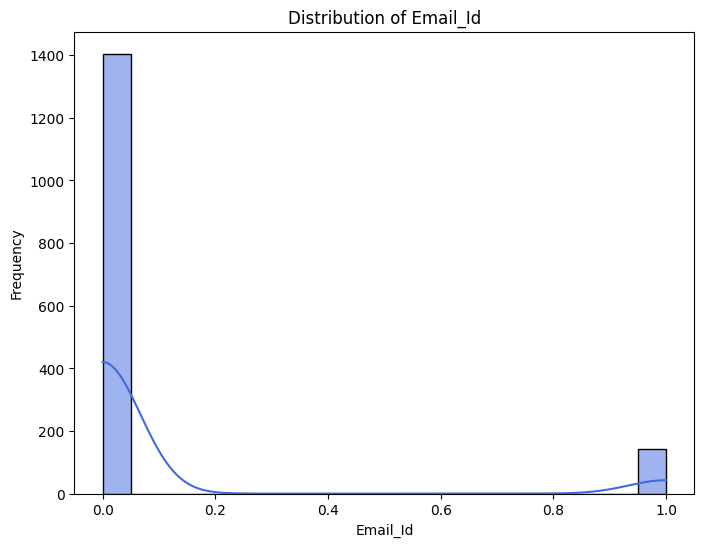

<Figure size 800x600 with 0 Axes>

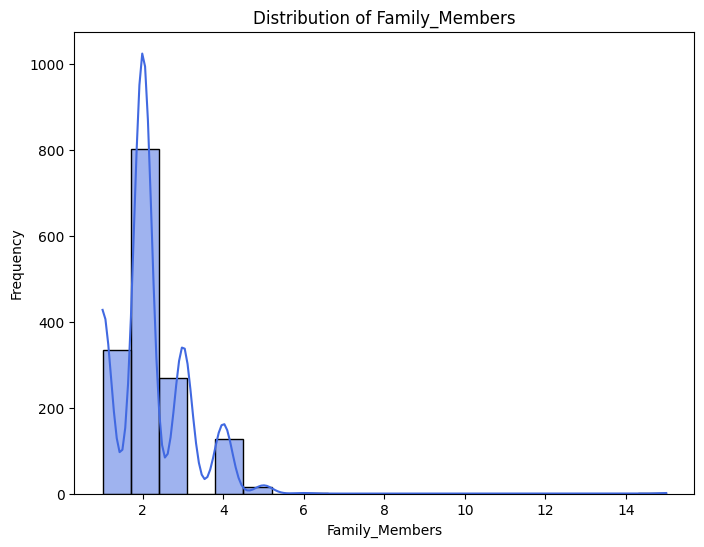

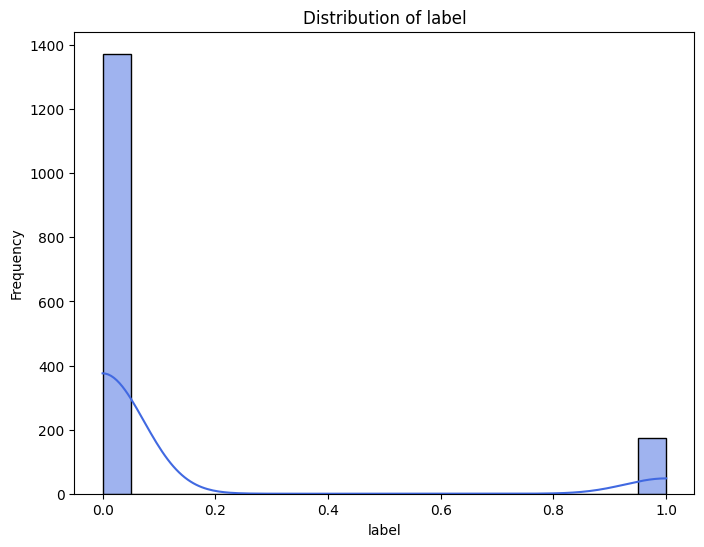

In [3732]:
for column in df.columns:
    if column == 'Ind_ID':
        continue
    plt.figure(figsize=(8, 6))

    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True, bins=20, color='royalblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


> **From the histogram plots, it appears that the data is right-skewed in the 'Children,' 'Annual_income,' and 'Family_Members' columns, suggesting potential outliers. On the other hand, the 'Mobile_phone' column shows a constant distribution. Additionally, the histograms indicate that the other columns are not normally distributed.**





###**Countplot for Categorical Features(Car_owner and Income_type):**

Creating a countplot to visualize the distribution of Car_owner within each category of Income_type in the dataset.

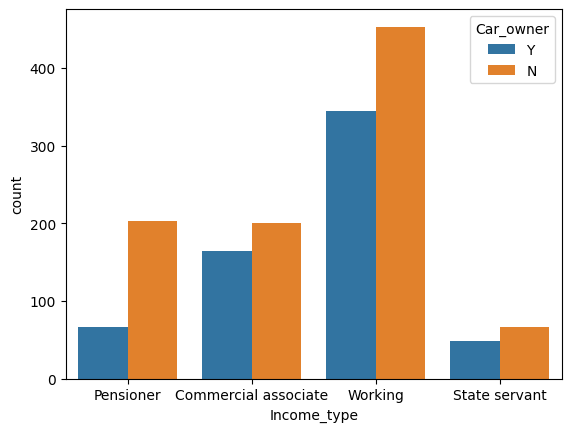

In [3733]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Income_type',hue='Car_owner',data=df)
plt.show()



>**From the above count plot, it is clear that the majority of car owners belong to the 'Working' income type category.**




### **Scatter Plot for Numerical Features(Annual_income and Employed days):**

Creating a scatter plot to visualize the relationship between Annual_income and Employed_days, with points colored by Gender in the dataset.

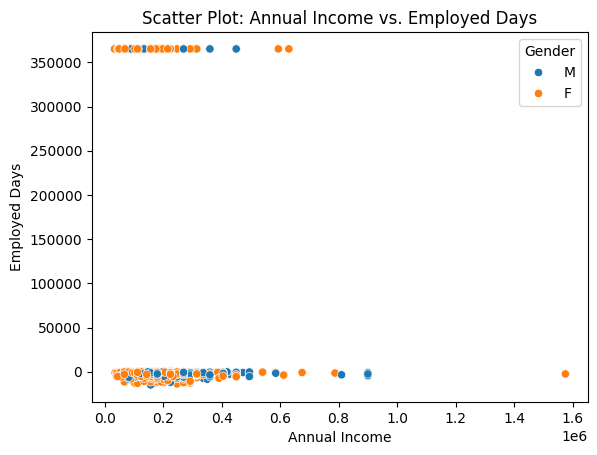

In [3734]:
sns.scatterplot(data=df, x='Annual_income', y='Employed_days', hue='Gender')
plt.title('Scatter Plot: Annual Income vs. Employed Days')
plt.xlabel('Annual Income')
plt.ylabel('Employed Days')
plt.show()


### **Boxplot for Categorical and Numerical Features(Gender and Annual_income):**

Creating a boxplot to visualize the distribution of Annual_income by Gender in the dataset

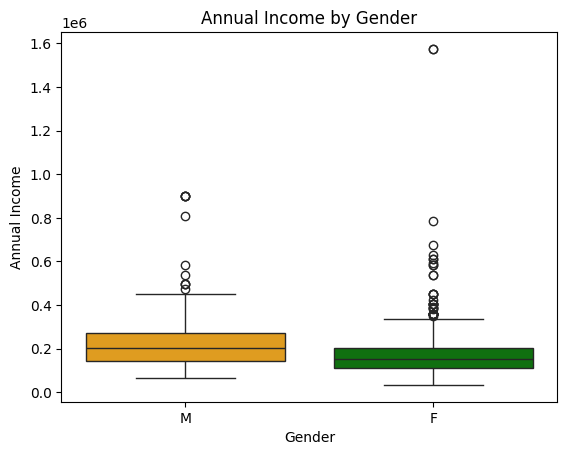

In [3735]:
custom_palette = {'M': 'orange', 'F': 'Green'}
sns.boxplot(data=df, x='Gender', y='Annual_income',palette=custom_palette)
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()


  >**From the above box plot we can see that males income is higher than the females**




### **Histogram for Annual Income:**

Creating a histogram to visualize the distribution of Annual_income in the dataset.

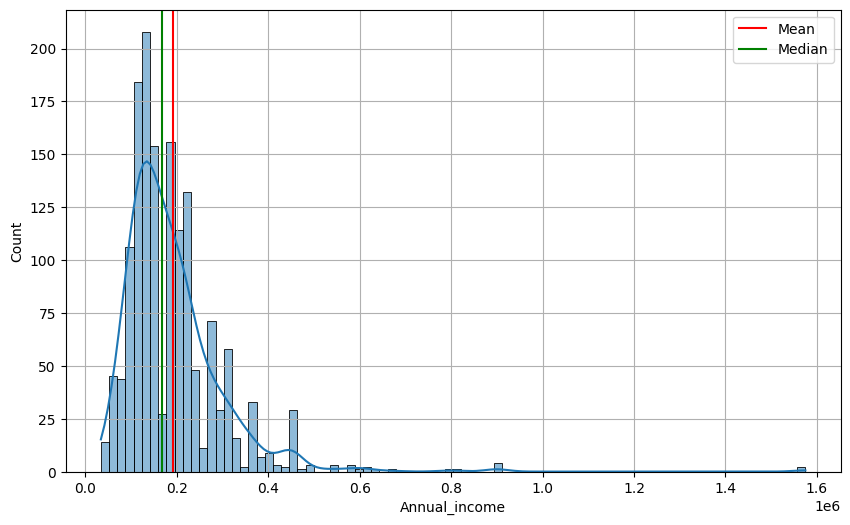

In [3736]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Annual_income',kde=True)
plt.axvline(x=df['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=df['Annual_income'].median(),color="green",label="Median")
plt.grid()
plt.legend()



> **From the above histogram,we can see that the data is not normally distributed and it is right skewed.There might be outliers in the annual income column.**




### **Countplot for Categorical Features(Gender and Occupation_type):**

Creating a countplot to visualize the relationship between Gender and Occupation_type in the dataset.

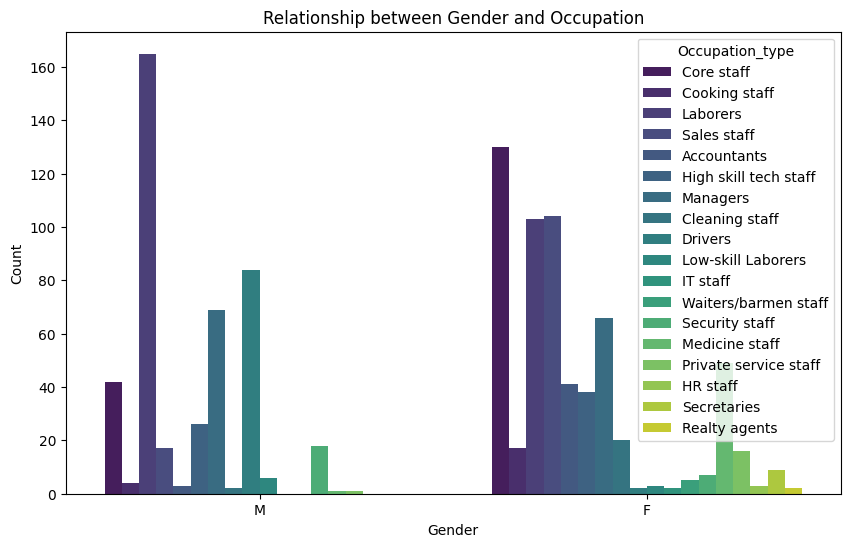

In [3737]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Occupation_type', palette='viridis')
plt.title('Relationship between Gender and Occupation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



> **The countplot clearly shows that females surpass males in most Occupation Type categories**




### **Average Annual Income by Occupation:**

Creating a bar chart to display the average annual income for each type of occupation in the dataset.

In [3738]:
avg_income_by_occupation = df.groupby('Occupation_type')['Annual_income'].mean().reset_index()

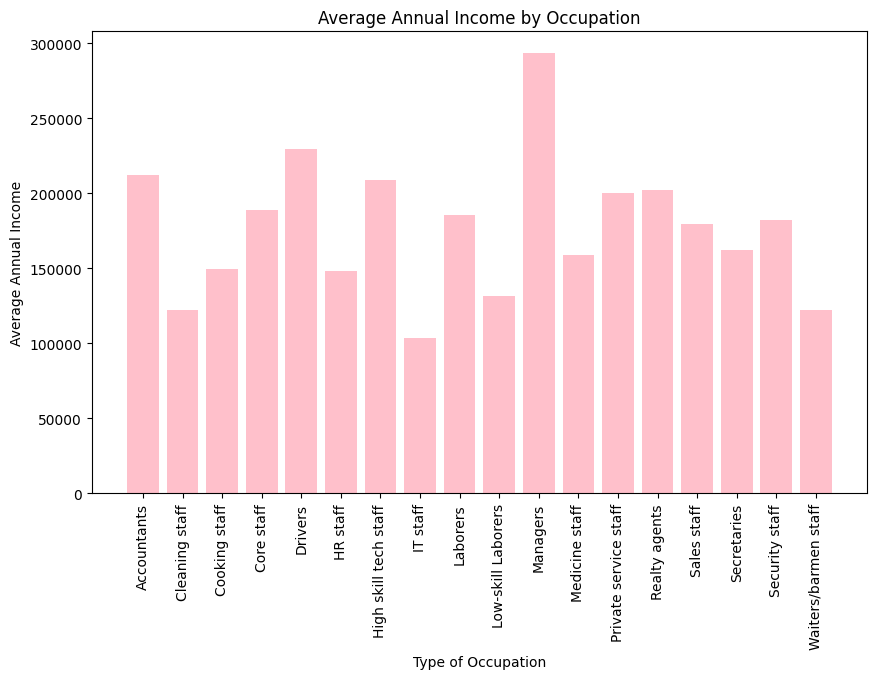

In [3739]:
plt.figure(figsize=(10, 6))
plt.bar(avg_income_by_occupation['Occupation_type'], avg_income_by_occupation['Annual_income'], color='pink')
plt.xlabel('Type of Occupation')
plt.ylabel('Average Annual Income')
plt.title('Average Annual Income by Occupation')
plt.xticks(fontsize=10,rotation=90)
plt.show()



> **The graph clearly shows that 'Managers' have the highest average income among all job types**




### **Boxplot for Annual Income by Marital Status:**

Creating a boxplot to visualize the variation in Annual_income based on Marital_status in the dataset.

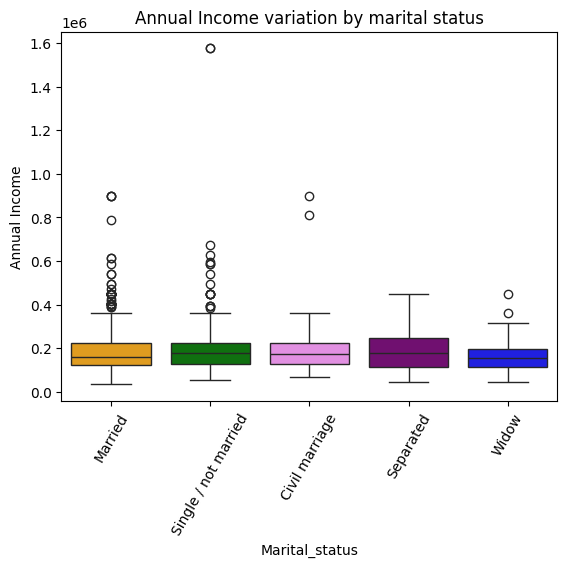

In [3740]:
colors = ["orange", "green", "violet","purple","blue"]
sns.boxplot(data=df, x='Marital_status', y='Annual_income',palette=colors)
plt.title('Annual Income variation by marital status')
plt.xlabel('Marital_status')
plt.ylabel('Annual Income')
plt.xticks(fontsize=10,rotation=60)
plt.show()



> **The boxplot indicates that for most marital statuses, the income distribution remains consistent. However, the 'Separated' group shows slightly higher income, while 'Widow' tends to have lower income.**



### **Pie Chart for Family Members Distribution by Marital Status:**

Creating a pie chart to illustrate the distribution of family members across different marital statuses in the dataset

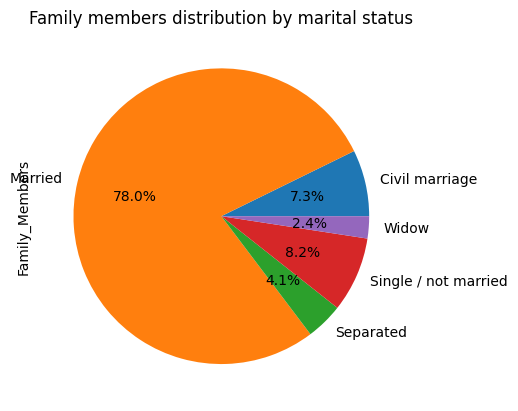

In [3741]:
df.groupby("Marital_status")["Family_Members"].sum().plot(kind = "pie" ,autopct='%1.1f%%')
plt.title("Family members distribution by marital status")
plt.show()



> **The above pie chart illustrates the distribution of family members by marital status. The highest proportion is observed in the 'Married' category.**




### **Boxplot for Annual Income by Education:**

Creating a boxplot to visualize the distribution of Annual_income based on different levels of Education in the dataset

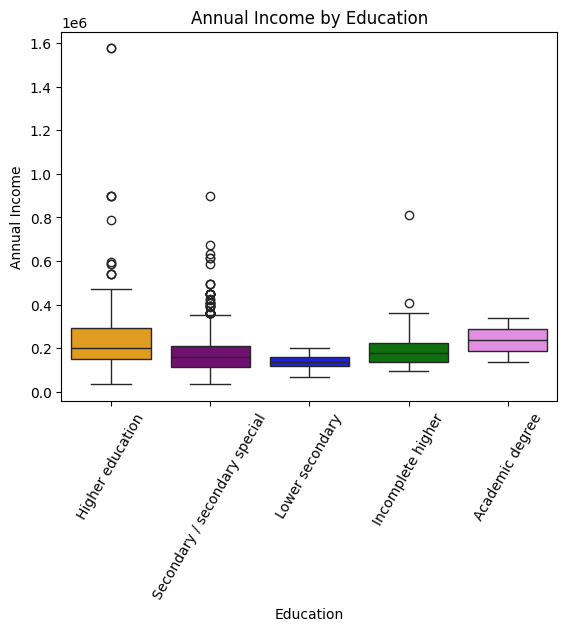

In [3742]:
colors = ["orange","purple","blue", "green", "violet"]
sns.boxplot(data=df, x='Education', y='Annual_income',palette=colors)
plt.title('Annual Income by Education')
plt.xlabel('Education')
plt.ylabel('Annual Income')
plt.xticks(fontsize=10,rotation=60)
plt.show()



> **From the above boxplot indicates that people with higher education generally have higher incomes. Specifically, those with 'Higher Education' tend to earn more.**



### **Pie Chart for Credit Approval Status:**

Creating a pie chart to represent the distribution of credit approval status in the dataset.

In [3743]:
label_counts = df["label"].value_counts()
label_counts

0    1373
1     175
Name: label, dtype: int64

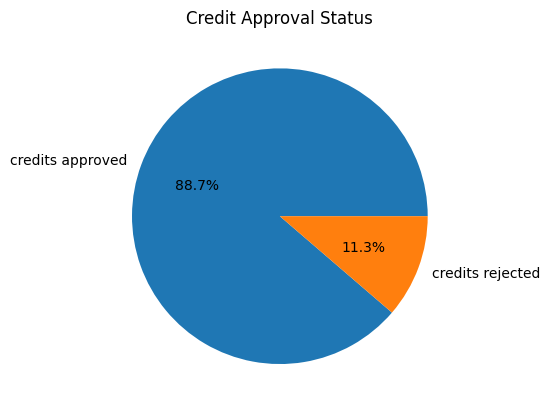

In [3744]:
plt.pie(label_counts, labels=["credits approved", "credits rejected"], autopct='%1.1f%%')
plt.title("Credit Approval Status")
plt.show()



> **The above pie chart shows most of the credits are approved, indicating an imbalance in the data. The 'credits approved' category has a higher percentage.**



### **Boxplots for Numerical Features:**

Creating a grid of boxplots to visualize the distribution of numerical features in the dataset. Each boxplot represents the distribution of a specific numerical column.

In [3745]:
import warnings

warnings.filterwarnings("ignore")


<Figure size 1200x800 with 0 Axes>

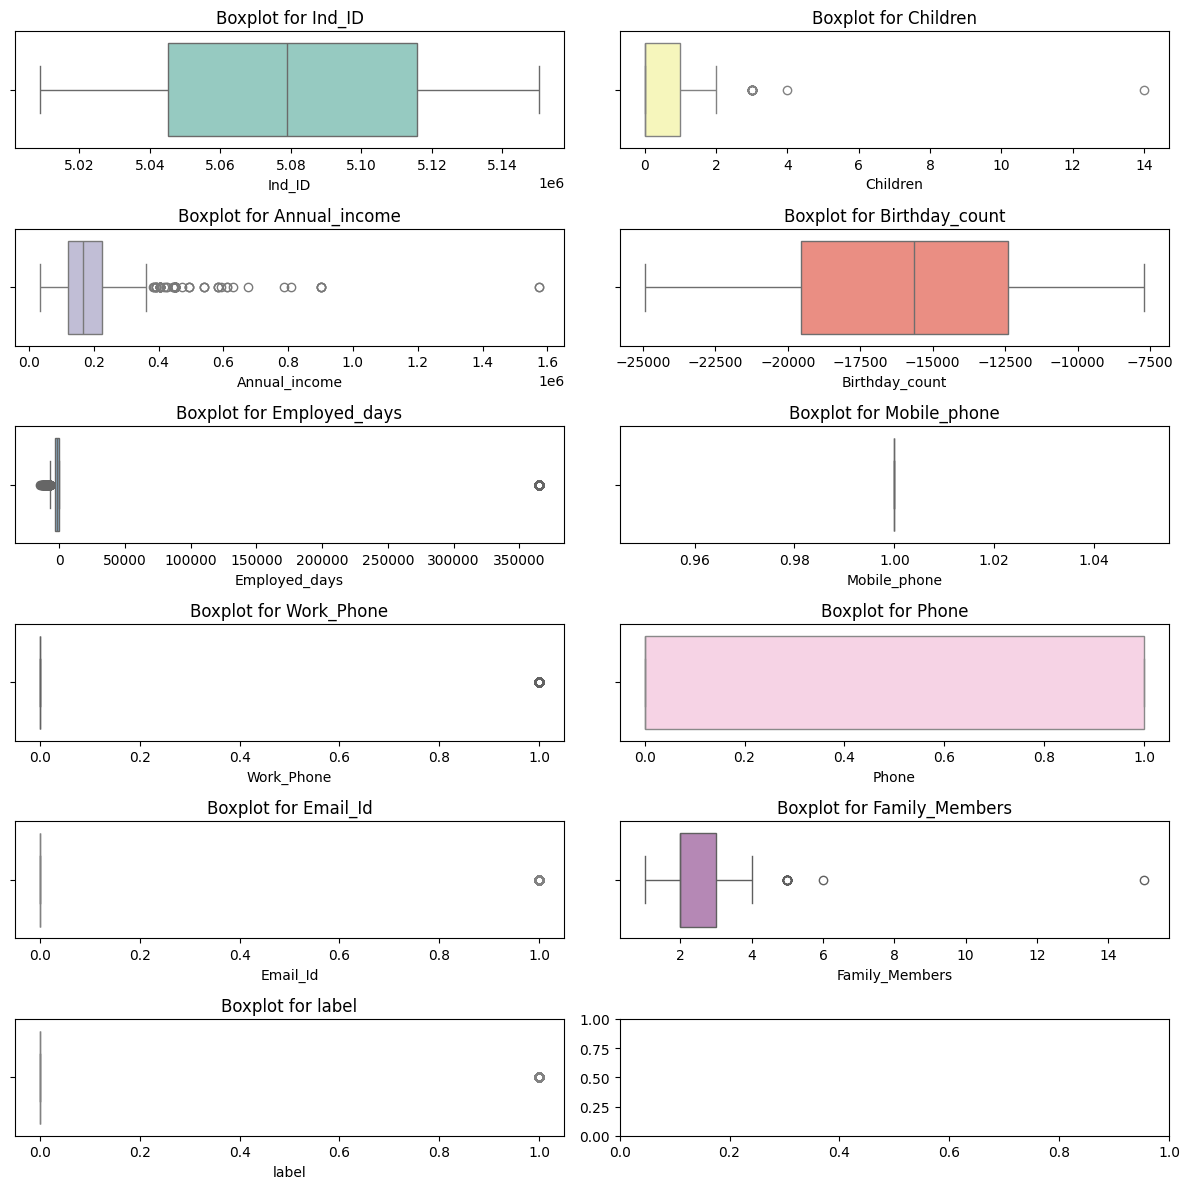

In [3746]:
plt.figure(figsize=(12, 8))
numerical_columns = df.select_dtypes(include="number").columns
num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2*num_rows))
axes = axes.flatten()
colors = sns.color_palette("Set3")
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x=column, ax=axes[i],color=colors[i % len(colors)])
    axes[i].set_title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()






>
**The boxplots show data distribution. 'Annual Income,' 'Employed Days,' and 'Family Members' have some unusual values, called outliers.**


In [3747]:
df.drop('Mobile_phone', axis=1, inplace=True) # Removing the Mobile_phone column as it is showing constant value in the histogram plot.It will not be more important feature for our analysis


### **Correlation Heatmap for Numerical Features:**

Creating a heatmap to visualize the correlation between numerical features in the dataset. The values in the heatmap represent the strength and direction of the linear relationship between pairs of features.

<Axes: >

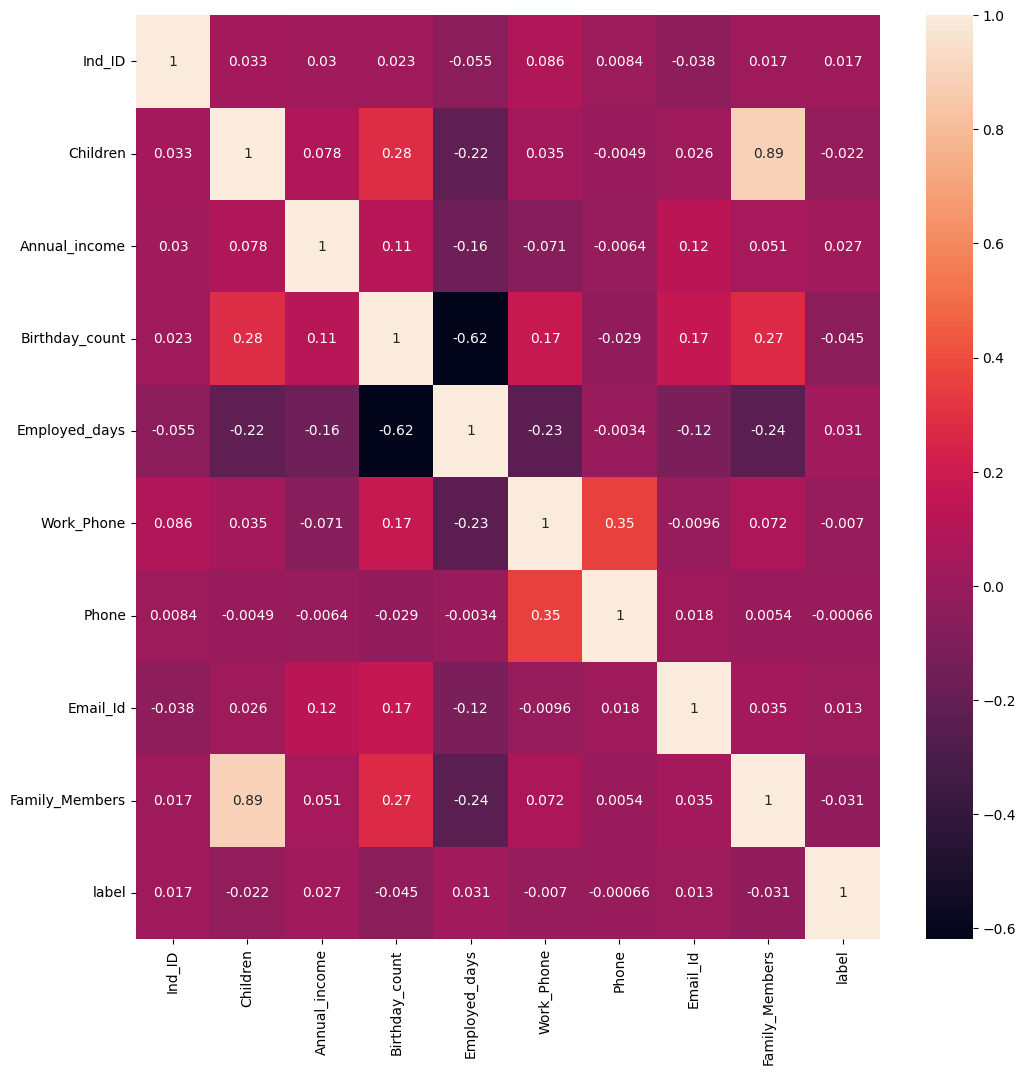

In [3748]:

plt.figure(figsize=(12,12))
s = df.select_dtypes(include = "number").corr()
sns.heatmap(s,annot=True)






> **The heatmap reveals a strong correlation between the 'Children' and 'Family Members' columns. Considering this, we can consider removing one of the columns to avoid redundancy**



### **Features having missing values**

1.Gender

2.Annual income

3.Birthday counts

4.Occupation type

In [3749]:
numerical_features = df[["Annual_income","Birthday_count"]]
print(numerical_features.columns)

Index(['Annual_income', 'Birthday_count'], dtype='object')


In [3750]:
categorical_features = df[["Gender" ,"Occupation_type"]]
print(categorical_features.columns)

Index(['Gender', 'Occupation_type'], dtype='object')


### **Feature Transformation:**

In [3751]:
df["Age"] = np.abs(df["Birthday_count"]/365.2425)
df["Age"]

0       51.395990
1       37.117805
2             NaN
3       37.117805
4       37.117805
          ...    
1543    32.737154
1544    28.006051
1545    36.069187
1546    41.868074
1547    45.451994
Name: Age, Length: 1548, dtype: float64

In [3752]:
df.drop(columns=['Birthday_count'], inplace=True)

In [3753]:
df['Years_Employed']=-df['Employed_days']/365.2425
df.loc[df['Years_Employed']<0,'Years_Employed']=0
df.drop('Employed_days', axis=1, inplace=True)



*   Created a new feature "Age" by calculating the absolute value of "Birthday_count" divided by 365.2425.
*   Updated the "Years_Employed" feature by taking the negative of "Employed_days" divided by 365.2425. If the calculated value was less than 0, it was set to 0.
*   Dropped the original "Employed_days" and "Birthday_count" features from the dataset.










### **Handling Missing Values:**

Features with missing values are :              

1.   Gender
2.   Age
3.   Annual income
4.   Occupation type



In [3754]:
df.isnull().sum()

Ind_ID               0
Gender               7
Car_owner            0
Property_owner       0
Children             0
Annual_income       23
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Work_Phone           0
Phone                0
Email_Id             0
Occupation_type    488
Family_Members       0
label                0
Age                 22
Years_Employed       0
dtype: int64

In [3755]:
df.head(2)

,Ind_ID,Gender,Car_owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Work_Phone,Phone,Email_Id,Occupation_type,Family_Members,label,Age,Years_Employed
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,NaN,2,1,51.395990,0.000000
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,NaN,2,1,37.117805,1.604414


In [3756]:
df.drop(columns = ["Work_Phone","Children"],inplace=True)

In [3757]:
print(df["Gender"].isnull().sum())
df["Gender"].value_counts()


7


F    973
M    568
Name: Gender, dtype: int64

In [3758]:
print(df["Gender"].unique())

['M' 'F' nan]


In [3759]:
from sklearn.impute import SimpleImputer

imputer_gender = SimpleImputer(strategy='most_frequent')
df['Gender'] = imputer_gender.fit_transform(df[['Gender']])

In [3760]:
df["Gender"].isnull().sum()

0

In [3761]:
df["Occupation_type"].isnull().sum()

488

In [3762]:
df["Age"].isnull().sum()

22

In [3763]:
median_age = df.groupby(['Income_type'])['Age'].median()
median_age

Income_type
Commercial associate    39.874878
Pensioner               60.195623
State servant           41.124732
Working                 39.762623
Name: Age, dtype: float64

In [3764]:
df['Age'] = df['Age'].fillna(df['Income_type'].map(median_age))
df['Age'].fillna(df['Income_type'].map(median_age), inplace=True)

In [3765]:
df["Age"].isnull().sum()

0

In [3766]:
median_income= df.groupby(['Income_type'])['Annual_income'].median()
median_income

Income_type
Commercial associate    202500.0
Pensioner               135000.0
State servant           180000.0
Working                 157500.0
Name: Annual_income, dtype: float64

In [3767]:
df['Annual_income'] = df['Annual_income'].fillna(df['Income_type'].map(median_income))
df['Annual_income'].fillna(df['Income_type'].map(median_income))

0       180000.0
1       315000.0
2       315000.0
3       202500.0
4       315000.0
          ...   
1543    202500.0
1544    225000.0
1545    180000.0
1546    270000.0
1547    225000.0
Name: Annual_income, Length: 1548, dtype: float64

### **Scatter Plot for Age vs  Annual Income (with Imputed Values):**

Creating a scatter plot to visualize the relationship between 'Age' and 'Annual_income' in the dataset.

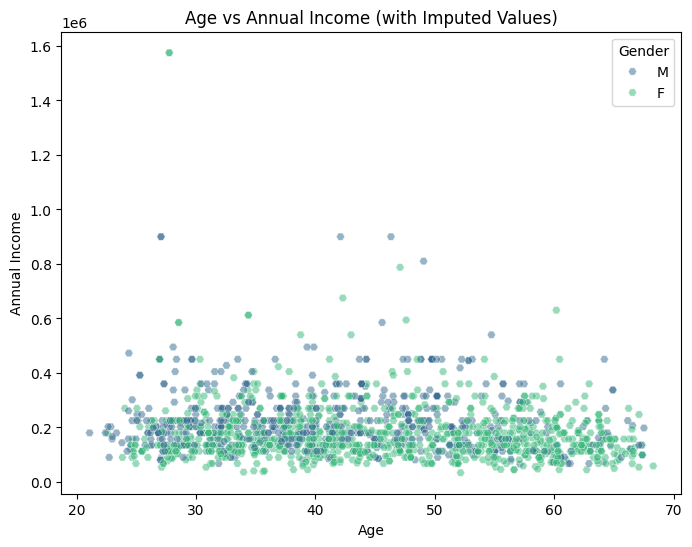

In [3768]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Annual_income', marker='H', hue="Gender", palette='viridis', alpha=0.5)
plt.title('Age vs Annual Income (with Imputed Values)')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()



**From the above plot it is clear that there is no such difference in annual income rise with respect to age.It is almost constantly showing with all the ages for both females and males also.**



In [3769]:
df.isnull().sum()

Ind_ID               0
Gender               0
Car_owner            0
Property_owner       0
Annual_income        0
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Phone                0
Email_Id             0
Occupation_type    488
Family_Members       0
label                0
Age                  0
Years_Employed       0
dtype: int64

In [3770]:
df['Occupation_type'] = df['Occupation_type'].fillna(value="other")

In [3771]:
df.head(5)

,Ind_ID,Gender,Car_owner,Property_owner,Annual_income,Income_type,Education,Marital_status,Housing_type,Phone,Email_Id,Occupation_type,Family_Members,label,Age,Years_Employed
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,other,2,1,51.395990,0.000000
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,0,other,2,1,37.117805,1.604414
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,0,other,2,1,39.874878,1.604414
3,5009749,F,Y,N,202500.0,Commercial associate,Higher education,Married,House / apartment,1,0,other,2,1,37.117805,1.604414
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,0,other,2,1,37.117805,1.604414


*   Imputed missing values in the 'Gender' column using the most frequent strategy.
*   Imputed missing values in the 'Age' column with the median age based on the 'Income_type' group.
*   Imputed missing values in the 'Annual_income' column with the median income based on the 'Income_type' group.
*   Imputed missing values in the 'Occupation_type' column with the value "other".

### **Outlier treatment**

1. Annual income  
2. Years employed
3. Family members



**1.Outlier treatment for Annual_income feature**

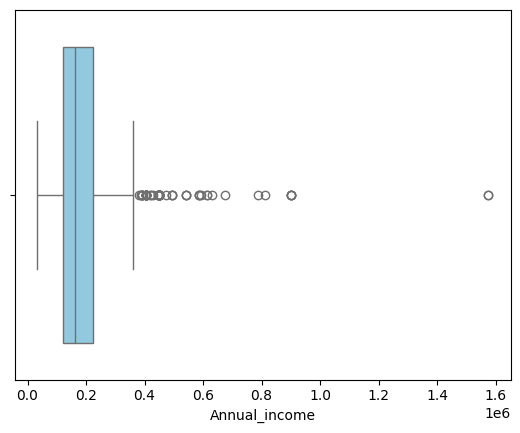

In [3772]:

sns.boxplot(data=df, x='Annual_income',color = "skyblue")
plt.show()

In [3773]:
Q1 = np.percentile(df['Annual_income'],25)
Q3 = np.percentile(df['Annual_income'],75)

IQR=Q3-Q1

In [3774]:
upper_limit = Q3+1.5*IQR

upper_limit

380250.0

In [3775]:
df["Annual_income"] = np.where(df["Annual_income"]>upper_limit,upper_limit,df["Annual_income"])


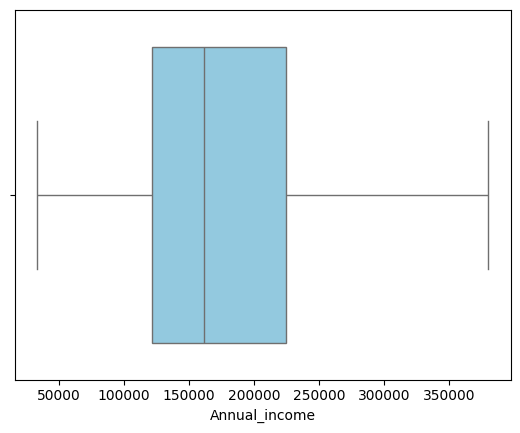

In [3776]:

sns.boxplot(data=df, x='Annual_income', color='skyblue')
plt.show()

**2.Outlier treatment for Years_employed feature**

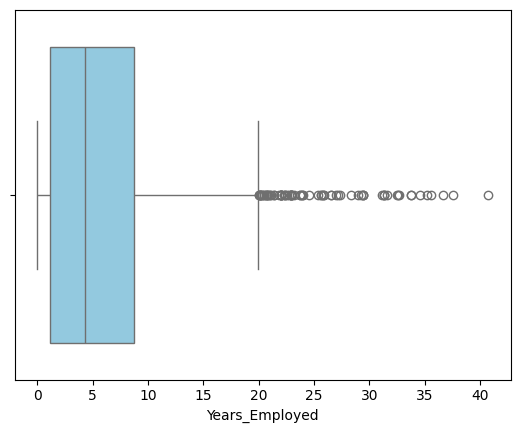

In [3777]:

sns.boxplot(data=df, x='Years_Employed',  color='skyblue')
plt.show()

In [3778]:
Q1 = np.percentile(df['Years_Employed'],25)
Q3 = np.percentile(df['Years_Employed'],75)

In [3779]:
IQR=Q3-Q1

In [3780]:
upper_limit = Q3+1.5*IQR

upper_limit

19.95557745881161

In [3781]:
df["Years_Employed"] = np.where(df["Years_Employed"]>upper_limit,upper_limit,df["Years_Employed"])

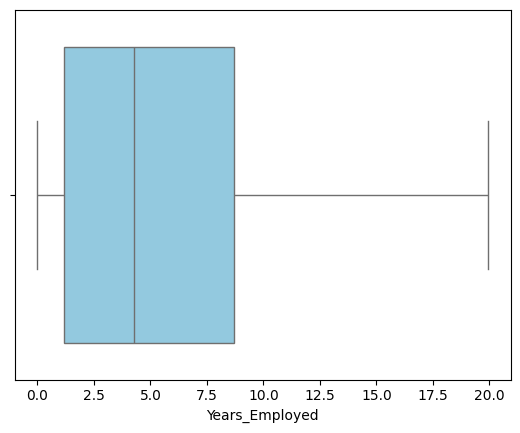

In [3782]:

sns.boxplot(data=df, x='Years_Employed', color='skyblue')
plt.show()

In [3783]:
df['Years_Employed'] = np.sqrt(df['Years_Employed'])

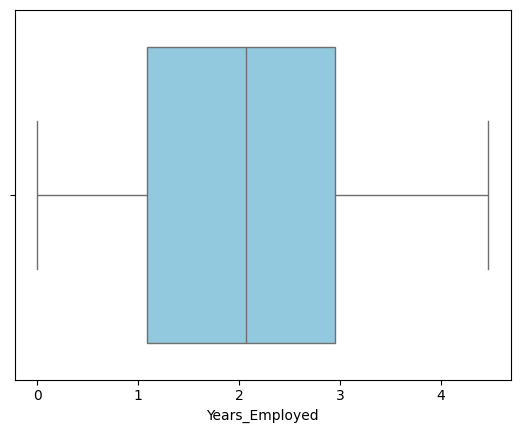

In [3784]:

sns.boxplot(data=df, x='Years_Employed', color='skyblue')
plt.show()

**3.Outlier treatment for Family members column**

<Axes: xlabel='Family_Members'>

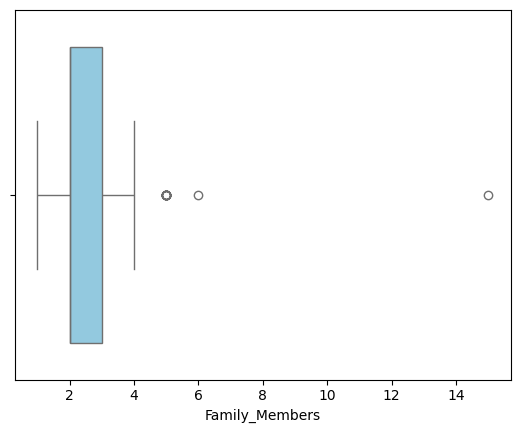

In [3785]:
sns.boxplot(data=df, x='Family_Members', color='skyblue')

In [3786]:
# removing the extreme values

In [3787]:
df = df[df['Family_Members'] < 14]

<Axes: xlabel='Family_Members'>

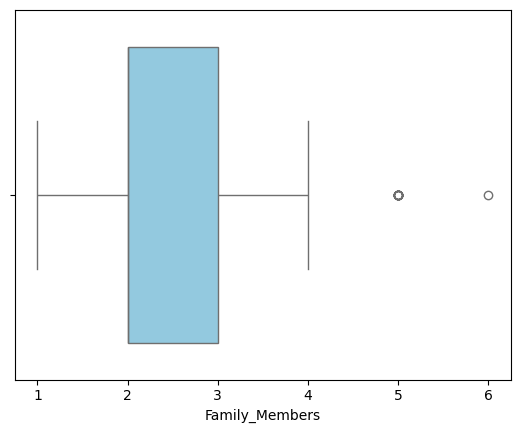

In [3788]:
sns.boxplot(data=df, x='Family_Members', color='skyblue')

In [3789]:
df.head(5)

,Ind_ID,Gender,Car_owner,Property_owner,Annual_income,Income_type,Education,Marital_status,Housing_type,Phone,Email_Id,Occupation_type,Family_Members,label,Age,Years_Employed
0,5008827,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,other,2,1,51.395990,0.000000
1,5009744,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,0,other,2,1,37.117805,1.266654
2,5009746,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,0,other,2,1,39.874878,1.266654
3,5009749,F,Y,N,202500.0,Commercial associate,Higher education,Married,House / apartment,1,0,other,2,1,37.117805,1.266654
4,5009752,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,0,other,2,1,37.117805,1.266654


**Annual Income:** Capped values at the upper limit.

**Years Employed:** Capped values at the upper limit.

**Family Members:** Removed rows where the 'Family_Members' column exceeds 14.

In [3790]:
# saving the DataFrame to a CSV file without including the index column.
df.to_csv("credit_cv",index=False)

In [3791]:
print(df.columns)

Index(['Ind_ID', 'Gender', 'Car_owner', 'Property_owner', 'Annual_income',
       'Income_type', 'Education', 'Marital_status', 'Housing_type', 'Phone',
       'Email_Id', 'Occupation_type', 'Family_Members', 'label', 'Age',
       'Years_Employed'],
      dtype='object')


In [3792]:

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')


In [3793]:
print(df.dtypes)


Ind_ID                int64
Gender             category
Car_owner          category
Property_owner     category
Annual_income       float64
Income_type        category
Education          category
Marital_status     category
Housing_type       category
Phone                 int64
Email_Id              int64
Occupation_type    category
Family_Members        int64
label                 int64
Age                 float64
Years_Employed      float64
dtype: object


##**Hypothesis Testing**

### **Hypothesis test 1**:

Logistic regression is the best algorithm out of other algorithms

**(H0):**
The recall of the logistic regression model is equal to the recall of the random forest model.

**(Ha):**
The recall of the logistic regression model is different from the recall of the random forest model



  ###**H0 represents Null Hypothesis**    
  ###**Ha represents Alternate Hypothesis**

**I am conducting a ttest_ind to test my hypothesis, using numerical columns as evidence**

In [3794]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from scipy.stats import ttest_ind

features = ['Annual_income', 'Family_Members', 'Age', 'Years_Employed']
target = 'label'



x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict(x_test)
recall_logistic = recall_score(y_test, y_pred_logistic)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
recall_rf = recall_score(y_test, y_pred_rf)

t_statistic, p_value = ttest_ind(y_pred_logistic, y_pred_rf)

print(f'Recall for Logistic Regression: {recall_logistic}')
print(f'Recall for Random Forest: {recall_rf}')
print(f'T-statistic for Recall: {t_statistic}')
print(f'P-value for Recall: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Ha is accepted")
else:
    print("Ho is accepted")



Recall for Logistic Regression: 0.0
Recall for Random Forest: 0.4666666666666667
T-statistic for Recall: -3.963819421565475
P-value for Recall: 8.237713253203788e-05
Ha is accepted


### **Hypothesis test 2:**

Investigating the Independence of Education and Gender

**(H0):**
Education and Gender are independent.

**(Ha):**
There is an association between Education and Gender.

**I am conducting a chi-square test to validate my hypothesis, utilizing categorical columns as the basis for my analysis.**

In [3795]:
from scipy.stats import chi2_contingency

In [3796]:
ed_gender = pd.crosstab(df['Education'], df['Gender'])

In [3797]:
print("Contingency Table:")
print(ed_gender)

Contingency Table:
Gender                           F    M
Education                              
Academic degree                  2    0
Higher education               255  171
Incomplete higher               46   22
Lower secondary                 14    7
Secondary / secondary special  663  367


In [3798]:
chi2_stat, p_value,degrees_of_freedom,expected_frequencies = chi2_contingency(ed_gender)
print(f'Chi-square statistic: {chi2_stat}')
print(f'P-value: {p_value}')

Chi-square statistic: 4.493739134636016
P-value: 0.34329050215369966


In [3799]:
alpha = 0.05
if p_value < alpha:
    print("Ha is accepted")
else:
    print("Ho is accepted")

Ho is accepted


###**Hypothesis test 3:**
Analyzing the Association between Credit Card Approval and Income Level

**(H0):**
There is no significant association between credit card approval and income level.

**(Ha):**
There is a significant association between credit card approval and income level.

**I am conducting a ttest_ind to support my hypothesis, utilizing two numerical columns for analysis**

In [3800]:

from scipy.stats import ttest_ind

approved_income = df[df['label'] == 0]['Annual_income']
denied_income = df[df['label'] == 1]['Annual_income']
t_statistic, p_value = ttest_ind(approved_income, denied_income)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Ha is accepted")
else:
    print("Ho is accepted")

T-statistic: -0.7429750680399416
P-value: 0.45760972799651733
Ho is accepted


### **Hypothesis test 4:**
Analyzing Annual Income Difference between Males and Females

**(H0):**
There is no significant difference in annual income between males and females.

**(Ha):**
There is a significant difference in annual income between males and females.

**I am conducting a ttest_ind to examine my hypothesis, employing one categorical and one numerical column for analysis**

In [3801]:
from scipy.stats import ttest_ind

male_income = df[df['Gender'] == 'M']['Annual_income']
female_income = df[df['Gender'] == 'F']['Annual_income']

t_stat, p_value = ttest_ind(male_income, female_income)

In [3802]:
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 10.708507434406766
P-value: 7.311559769435617e-26


In [3803]:
alpha = 0.05
if p_value < alpha:
    print("Ha is accepted")
else:
    print("Ho is accepted")


Ha is accepted


In [3804]:
df.isnull().sum()

Ind_ID             0
Gender             0
Car_owner          0
Property_owner     0
Annual_income      0
Income_type        0
Education          0
Marital_status     0
Housing_type       0
Phone              0
Email_Id           0
Occupation_type    0
Family_Members     0
label              0
Age                0
Years_Employed     0
dtype: int64

# **Encoding the Data:**

Performing encoding on categorical features to prepare the data for machine learning models.

### **Label Encoding for Gender:**

In [3805]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()

In [3806]:
df["Gender"] = le.fit_transform(df["Gender"]) # 1 for male and 0 for female
df["Gender"].head(5)

0    1
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

###**Ordinal Encoding for Education:**

In [3807]:
df["Education"].value_counts()

Secondary / secondary special    1030
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64

In [3808]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

In [3809]:
Education_order = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']
OE.fit(df[['Education']])
df['Education'] = OE.transform(df[['Education']])

### **Ordinal Encoding for Income Type:**

In [3810]:
df["Income_type"].value_counts()

Working                 797
Commercial associate    365
Pensioner               269
State servant           116
Name: Income_type, dtype: int64

In [3811]:
# ordering in ascending order according to the number of counts in each category
Income_type_order = [ 'State servant',
    'Pensioner',
    'Commercial associate',
    'Working']
OE.fit(df[["Income_type"]])
df["Income_type"] = OE.transform(df[["Income_type"]])

In [3812]:
df.drop(columns = ["Housing_type"],inplace = True)


### **Occupation Distribution**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Accountants'),
  Text(1, 0, 'Cleaning staff'),
  Text(2, 0, 'Cooking staff'),
  Text(3, 0, 'Core staff'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'HR staff'),
  Text(6, 0, 'High skill tech staff'),
  Text(7, 0, 'IT staff'),
  Text(8, 0, 'Laborers'),
  Text(9, 0, 'Low-skill Laborers'),
  Text(10, 0, 'Managers'),
  Text(11, 0, 'Medicine staff'),
  Text(12, 0, 'Private service staff'),
  Text(13, 0, 'Realty agents'),
  Text(14, 0, 'Sales staff'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'Security staff'),
  Text(17, 0, 'Waiters/barmen staff'),
  Text(18, 0, 'other')])

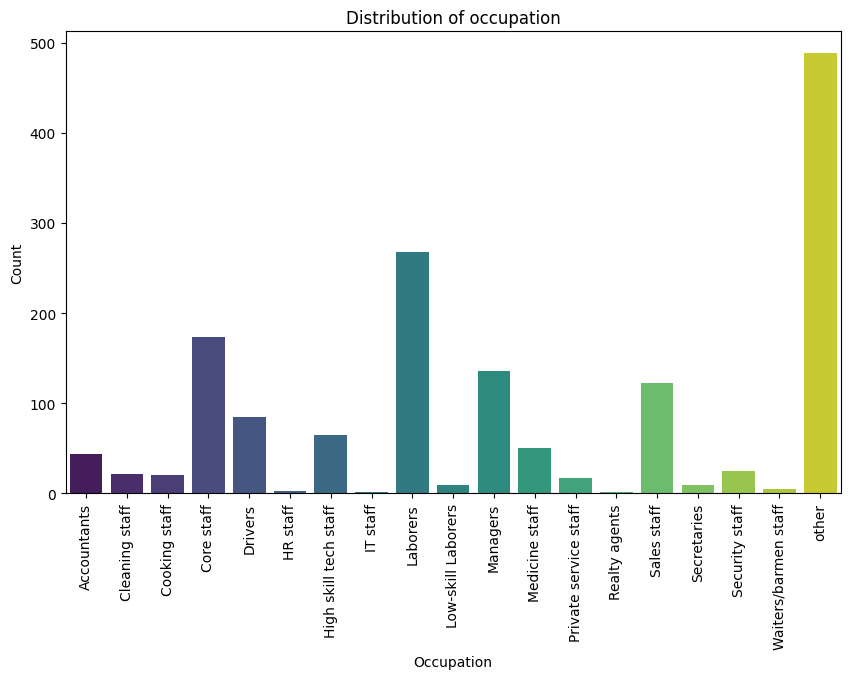

In [3813]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation_type',data=df,  palette='viridis')
plt.title('Distribution of occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)




> **The visualization provides an overview of the distribution of various occupations in the dataset. It is cler that the "other" category is predominant among the different occupation types.**



### **One-Hot Encoding for Occupation Type:**

In [3814]:
df = pd.get_dummies(df, columns=["Occupation_type"],drop_first=True)


### **Dropping Less Relevant Columns for my Analysis**

In [3815]:
df.drop(columns = ["Ind_ID",'Car_owner','Email_Id',"Marital_status","Property_owner"],inplace = True)

# **Handling Imbalanced Dataset Using Resampling Technique**

In [3816]:
X = df.drop(columns=['label'])
X

,Gender,Annual_income,Income_type,Education,Phone,Family_Members,Age,Years_Employed,Occupation_type_Cleaning staff,Occupation_type_Cooking staff,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff,Occupation_type_other
0,1,180000.0,1.0,1.0,0,2,51.395990,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,315000.0,0.0,1.0,1,2,37.117805,1.266654,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,315000.0,0.0,1.0,1,2,39.874878,1.266654,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,202500.0,0.0,1.0,1,2,37.117805,1.266654,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,315000.0,0.0,1.0,1,2,37.117805,1.266654,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,202500.0,0.0,1.0,0,2,32.737154,2.444200,0,0,...,0,1,0,0,0,0,0,0,0,0
1544,0,225000.0,0.0,2.0,0,1,28.006051,1.819376,0,0,...,0,0,0,0,0,0,0,0,0,0
1545,1,180000.0,3.0,1.0,0,4,36.069187,2.604188,0,0,...,0,1,0,0,0,0,0,0,0,0
1546,1,270000.0,3.0,4.0,1,2,41.868074,1.328891,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3817]:
column_names = X.columns

In [3818]:
column_names

Index(['Gender', 'Annual_income', 'Income_type', 'Education', 'Phone',
       'Family_Members', 'Age', 'Years_Employed',
       'Occupation_type_Cleaning staff', 'Occupation_type_Cooking staff',
       'Occupation_type_Core staff', 'Occupation_type_Drivers',
       'Occupation_type_HR staff', 'Occupation_type_High skill tech staff',
       'Occupation_type_IT staff', 'Occupation_type_Laborers',
       'Occupation_type_Low-skill Laborers', 'Occupation_type_Managers',
       'Occupation_type_Medicine staff',
       'Occupation_type_Private service staff',
       'Occupation_type_Realty agents', 'Occupation_type_Sales staff',
       'Occupation_type_Secretaries', 'Occupation_type_Security staff',
       'Occupation_type_Waiters/barmen staff', 'Occupation_type_other'],
      dtype='object')

In [3819]:
Y = df.drop(columns=X.columns)

In [3820]:
Y

,label
0,1
1,1
2,1
3,1
4,1
...,...
1543,0
1544,0
1545,0
1546,0


In [3821]:
Y.value_counts()

label
0        1372
1         175
dtype: int64

Dataset contains 1372 instances labeled as 0 and 175 instances labeled as 1.

# **Balancing the Dataset using SMOTE:**

In [3822]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=10)
X, Y= oversample.fit_resample(X, Y)


Applied SMOTE for oversampling to address class imbalance, storing the results in variables X and Y for further analysis

Y.value_counts()

In [3823]:
print("Number of samples in X:", len(X))
print("Number of samples in y:", len(Y))

Number of samples in X: 2744
Number of samples in y: 2744


In [3824]:
x = pd.DataFrame(X)
x.head()


,Gender,Annual_income,Income_type,Education,Phone,Family_Members,Age,Years_Employed,Occupation_type_Cleaning staff,Occupation_type_Cooking staff,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff,Occupation_type_other
0,1,180000.0,1.0,1.0,0,2,51.395990,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,315000.0,0.0,1.0,1,2,37.117805,1.266654,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,315000.0,0.0,1.0,1,2,39.874878,1.266654,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,202500.0,0.0,1.0,1,2,37.117805,1.266654,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,315000.0,0.0,1.0,1,2,37.117805,1.266654,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3825]:
y = Y

Converted the oversampled data into a DataFrame named 'x', showcasing the initial entries, while 'y' represents the target variable.


# **Splitting the Dataset into Training and Testing Sets:**

In [3826]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(2058, 26) (2058, 1)
(686, 26) (686, 1)


# **Feature Scaling:**
**Min-Max Scaling**

Applying Min-Max Scaling to normalize the numerical features.

In [3827]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3828]:

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)


# **Feature Selection:**

Utilizing the Ensemble Method of Random Forest Classifier for Feature Selection.

In [3829]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_auc_score,f1_score,confusion_matrix,auc

In [3830]:
rf_w = RandomForestClassifier(random_state=100,n_estimators=50)
rf_w.fit(x_train_scaled,y_train)
y_pred_rf = rf_w.predict(x_test_scaled)
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

In [3831]:
accuracy

0.9548104956268222

In [3832]:
importances = rf_w.feature_importances_
feature_names = list(x_train.columns)

f_df = pd.DataFrame({"Features": feature_names, "Importances": importances})
f_df.set_index("Importances", inplace=True)
f_df = f_df.sort_values("Importances")

### **Visualization of Feature Importances:**

<Axes: xlabel='Features', ylabel='Importances'>

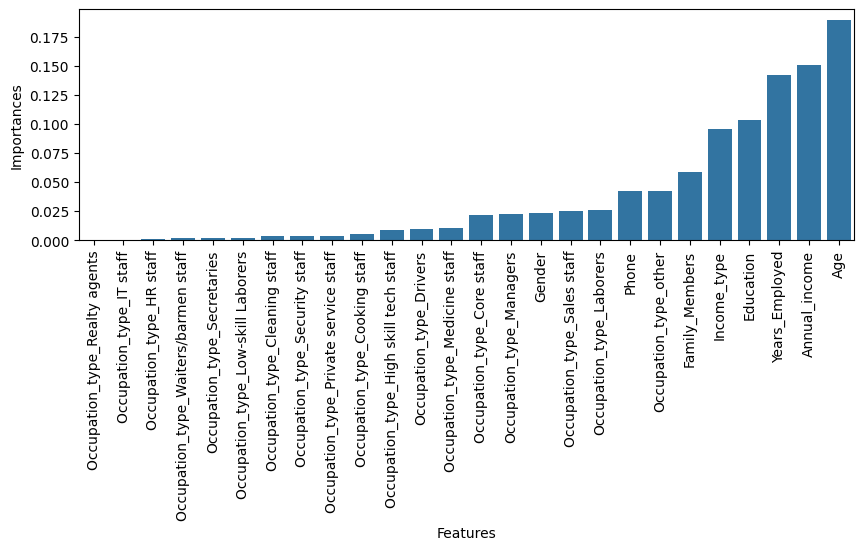

In [3833]:

plt.figure(figsize =(10,3))
plt.xticks(rotation = 90)
sns.barplot(x = "Features",y = "Importances" , data = f_df)

In [3834]:
Model_tree = RandomForestClassifier(random_state=100,n_estimators=50)

In [3835]:
sel_rf_tree = RFE(estimator = Model_tree, n_features_to_select=10,step = 1)

In [3836]:

x_train_rfe = sel_rf_tree.fit_transform(x_train_scaled,y_train)
print(sel_rf_tree.get_support())
print(sel_rf_tree.ranking_)
y_pred_rfe = sel_rf_tree.predict(x_test_scaled)

[ True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False  True False False
 False  True]
[ 1  1  1  1  1  1  1  1 10  8  4  5 15  7 16  2 12  3  6  9 17  1 13 11
 14  1]


In [3837]:
accuracy = metrics.accuracy_score(y_test, y_pred_rfe)
accuracy

0.9300291545189504

We picked the most important features for our models. Even with fewer features, our models still predict well, showing that we kept the key information

In [3838]:
selected_columns = [column for column, selected in zip(column_names, sel_rf_tree.get_support()) if selected]
print(selected_columns)

['Gender', 'Annual_income', 'Income_type', 'Education', 'Phone', 'Family_Members', 'Age', 'Years_Employed', 'Occupation_type_Sales staff', 'Occupation_type_other']


In [3839]:
x_train_selected = pd.DataFrame(x_train_scaled, columns=column_names)[selected_columns]
x_test_selected = pd.DataFrame(x_test_scaled, columns=column_names)[selected_columns]



# **Model Training**

### **Algorithms choosing for my analysis:**           

1.   Logistic Regression
2.   Support Vector Classifier
3.   Decision Tree Classifier
4.   Random Forest Classifier
5.   K Nearest Neighbour
6.   XGBoost Classifier

In [3840]:
LR = LogisticRegression(random_state=42)
SVC = SVC(random_state=10)
DTC = DecisionTreeClassifier(random_state=10)
RFC = rfc = RandomForestClassifier(random_state=42)
KNN = KNeighborsClassifier()
XGB = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

### **Model Evaluation:**

Evaluating classification algorithms on the test set

In [3841]:
Models_results = {}

In [3842]:
Models_list = [('Logistic Regression', LR),
               ('Support Vector classifier', SVC),
               ('Decision Tree', DTC),
               ('Random Forest', RFC),
               ('K-Nearest Neighbors', KNN),
               ('XGBoost', XGB )]


In [3843]:

for mn,models in Models_list:

    models.fit(x_train_selected, y_train)
    train_accuracy = models.score(x_train_selected, y_train)
    y_pred = models.predict(x_test_selected)
    pred_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    Models_results[mn] = [train_accuracy, pred_accuracy,precision, recall, roc_auc,f1]

In [3844]:
modelresults_df = pd.DataFrame(Models_results, index=['TrainingAccuracy', 'TestingAccuracy','Precision', 'Recall', 'ROC AUC Score','F1 Score']).T
modelresults_df

,TrainingAccuracy,TestingAccuracy,Precision,Recall,ROC AUC Score,F1 Score
Logistic Regression,0.696307,0.683673,0.656250,0.747774,0.684775,0.699029
Support Vector classifier,0.777454,0.746356,0.719677,0.792285,0.747145,0.754237
Decision Tree,0.996599,0.895044,0.873239,0.919881,0.895471,0.895954
Random Forest,0.996599,0.928571,0.933735,0.919881,0.928422,0.926756
K-Nearest Neighbors,0.887755,0.822157,0.783641,0.881306,0.823174,0.829609
XGBoost,0.995141,0.935860,0.939940,0.928783,0.935738,0.934328


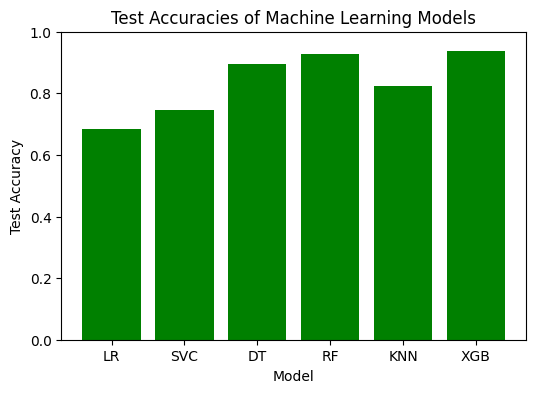

In [3845]:
data = {
    'Models': ['LR', 'SVC', 'DT', 'RF', 'KNN', 'XGB'],
    'Test Accuracy': [0.683673, 0.746356, 0.895044, 0.928571, 0.822157, 0.935860]
}
dfm = pd.DataFrame(data)
plt.figure(figsize=(6,4))
plt.bar(dfm['Models'], dfm['Test Accuracy'], color='Green')
plt.title('Test Accuracies of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.show()

### **Confusion Matrices for Various Classification Algorithms:**

In [3846]:
confusion_matrices = {}

for mn, model in Models_list:
    y_pred = model.predict(x_test_selected)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[mn] = cm

In [3847]:
for mn, cm in confusion_matrices.items():
   print(f"Confusion Matrix for {mn}:\n")
   print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
   print("\n")

Confusion Matrix for Logistic Regression:

          Predicted 0  Predicted 1
Actual 0          217          132
Actual 1           85          252


Confusion Matrix for Support Vector classifier:

          Predicted 0  Predicted 1
Actual 0          245          104
Actual 1           70          267


Confusion Matrix for Decision Tree:

          Predicted 0  Predicted 1
Actual 0          304           45
Actual 1           27          310


Confusion Matrix for Random Forest:

          Predicted 0  Predicted 1
Actual 0          327           22
Actual 1           27          310


Confusion Matrix for K-Nearest Neighbors:

          Predicted 0  Predicted 1
Actual 0          267           82
Actual 1           40          297


Confusion Matrix for XGBoost:

          Predicted 0  Predicted 1
Actual 0          329           20
Actual 1           24          313




**Summary :**

The confusion matrices show how well different models predict outcomes on the test set. They give counts of correct and incorrect predictions. Models like Random Forest and XGBoost perform well, making more correct positive predictions in my analysis.

# **Cross-Validation Accuracy for Various Classification Algorithms:**

In [3848]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True,random_state =  42) # I am just making them constant for my analysis to give explaination
kf

models_cross_val_scores = {}

for mn,models in Models_list:
           cv_scores = cross_val_score(models,x_train_selected, y_train, cv=kf, scoring='accuracy')

           models_cross_val_scores[mn] = cv_scores

In [3849]:
cross_val_df = pd.DataFrame(models_cross_val_scores).T

print(cross_val_df)

                                  0         1         2         3         4
Logistic Regression        0.679612  0.696602  0.691748  0.710462  0.703163
Support Vector classifier  0.779126  0.771845  0.745146  0.737226  0.771290
Decision Tree              0.866505  0.885922  0.890777  0.897810  0.890511
Random Forest              0.949029  0.917476  0.939320  0.924574  0.946472
K-Nearest Neighbors        0.834951  0.815534  0.834951  0.766423  0.827251
XGBoost                    0.951456  0.922330  0.907767  0.924574  0.939173


The scores suggest that Random Forest and XGBoost are really good at getting things right consistently in different scenarios, showing they are strong and dependable for the classification task. Decision Tree is also doing well. On the other hand, Support Vector Classifier and K-Nearest Neighbors, while not as high, still show decent accuracy.Logistic Regression exhibits the lowest accuracy among the classifiers considered.

# **Hyperparameter Tuning with Grid Search:**


1.   Random Forest classifier
2.   Decision Tree Classifier
3.   XGBoost classifier
4.   KNN Classifier


In [3850]:
from sklearn.model_selection import GridSearchCV



# **Hyperparameter Tuning for Random Forest Classifier:**

In [3851]:
rf = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [30, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf , param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train_selected, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [30, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [3852]:

print("Best Hyperparameters for Random forest classifier:", grid_search_rf.best_params_)

Best Hyperparameters for Random forest classifier: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}


In [3853]:
best_rf_model = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                       max_depth=grid_search_rf.best_params_['max_depth'],
                                       min_samples_split=grid_search_rf.best_params_['min_samples_split'],
                                       random_state=42)
best_rf_model.fit(x_train_selected, y_train)

RandomForestClassifier(max_depth=30, random_state=42)

In [3854]:
y_pred_rf = best_rf_model.predict(x_test_selected)


### **Various evaluation metrics after hyperparameter tuning for random forest classifier.**

In [3855]:
accuracy_best1 = accuracy_score(y_test, y_pred_rf)
precision_best1 = precision_score(y_test, y_pred_rf)
recall_best1 = recall_score(y_test, y_pred_rf)
f1_best1 = f1_score(y_test,y_pred_rf)
roc_auc_best1 = roc_auc_score(y_test, y_pred_rf)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best1}")
print(f"Precision after Hyperparameter Tuning: {precision_best1}")
print(f"Recall after Hyperparameter Tuning: {recall_best1}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best1}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best1}")

Accuracy after Hyperparameter Tuning: 0.9285714285714286
Precision after Hyperparameter Tuning: 0.9337349397590361
Recall after Hyperparameter Tuning: 0.9198813056379822
F1-Score after Hyperparameter Tuning: 0.9267563527653213
ROC AUC Score after Hyperparameter Tuning: 0.9284220281771574


### **Confusion Matrix for Random Forest (Hyperparameter Tuning):**

In [3856]:
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(f"\n{'':<12} {'Predicted 0':<12} {'Predicted 1':<12}")
print(f"{'Actual 0':<12} {cm[0, 0]:<12} {cm[0, 1]:<12}")
print(f"{'Actual 1':<12} {cm[1, 0]:<12} {cm[1, 1]:<12}")

Confusion Matrix for Random Forest:

             Predicted 0  Predicted 1 
Actual 0     327          22          
Actual 1     27           310         


### **Classification Report for Random Forest (Hyperparameter Tuning):**

In [3857]:
print("Classification Report for random forest classifier:\n", classification_report(y_test, y_pred_rf))

Classification Report for random forest classifier:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       349
           1       0.93      0.92      0.93       337

    accuracy                           0.93       686
   macro avg       0.93      0.93      0.93       686
weighted avg       0.93      0.93      0.93       686




### **Receiver Operating Characteristic (ROC) Curve for Random Forest (Hyperparameter Tuning):**

In [3858]:
y_prob_rf = best_rf_model.predict_proba(x_test_selected)[:, 1]
threshold = 0.5
pred_rf = (y_prob_rf > threshold).astype(int)

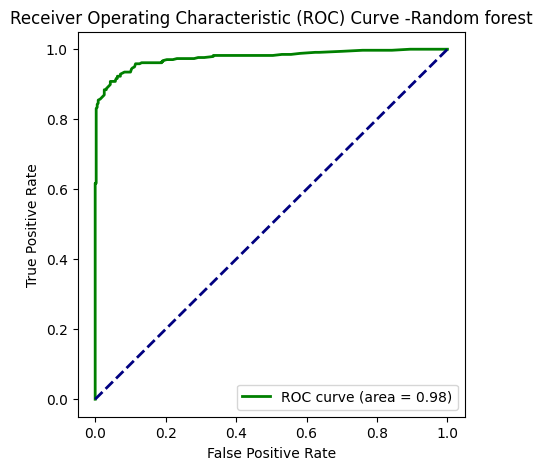

In [3859]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='Green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve -Random forest')
plt.legend(loc='lower right')
plt.show()

The area under the curve (AUC) is a measure of the classifier's overall performance. The curve being above the diagonal line indicates that the model has a good balance between true positive rate and false positive rate.

*  True Positive Rate indicates how well the model identifies actual positive instances.
*  False Positive Rate shows how often the model wrongly predicts a positive outcome among actual negative instances.

             


### **Varying Thresholds in ROC Curve Analysis for Random forest classifier:**

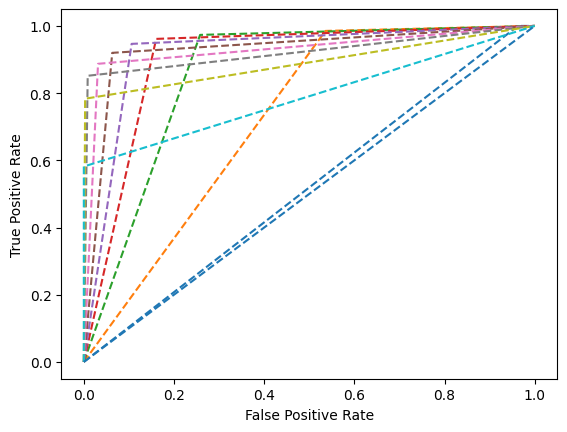

In [3860]:
for threshold in np.arange(0, 1.1, 0.1):
    y_pred_threshold1 = (y_prob_rf > threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'Threshold = {threshold:.1f} (AUC = {roc_auc:.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

 > **This  ROC curve for various thresholds  shows the difference between true positive rate and false positive rate at different decision threshold visually. Each point on the curve corresponds to a different threshold for classifying positive and negative instances.**

# **Hyperparameter Tuning for Decision tree Classifier:**

In [3861]:
dt = DecisionTreeClassifier(random_state=10)
param_grid = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_features" : ["auto", "sqrt", "log2"]
}

In [3862]:
grid_search_dt = GridSearchCV(estimator=dt , param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [3863]:
print("Best Hyperparameters:", grid_search_dt.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


In [3864]:
best_dt_model = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=10)
best_dt_model.fit(x_train_selected, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=10)

In [3865]:
y_pred_dt = best_dt_model.predict(x_test_selected)

### **Various evaluation metrics after hyperparameter tuning for Decision tree classifier.**

In [3866]:
accuracy_best2 = accuracy_score(y_test, y_pred_dt)
precision_best2 = precision_score(y_test,y_pred_dt)
recall_best2 = recall_score(y_test,y_pred_dt)
f1_best2 = f1_score(y_test,y_pred_dt)
roc_auc_best2 = roc_auc_score(y_test,y_pred_dt)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best2}")
print(f"Precision after Hyperparameter Tuning: {precision_best2}")
print(f"Recall after Hyperparameter Tuning: {recall_best2}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best2}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best2}")

Accuracy after Hyperparameter Tuning: 0.8848396501457726
Precision after Hyperparameter Tuning: 0.8583333333333333
Recall after Hyperparameter Tuning: 0.9169139465875371
F1-Score after Hyperparameter Tuning: 0.8866571018651364
ROC AUC Score after Hyperparameter Tuning: 0.885391070714972


### **Confusion Matrix for Decision tree classifier (Hyperparameter Tuning):**

In [3867]:
cm = confusion_matrix(y_test, y_pred_dt)

print("Confusion Matrix for Decision tree clasifier:")
print(f"\n{'':<12} {'Predicted 0':<12} {'Predicted 1':<12}")
print(f"{'Actual 0':<12} {cm[0, 0]:<12} {cm[0, 1]:<12}")
print(f"{'Actual 1':<12} {cm[1, 0]:<12} {cm[1, 1]:<12}")

Confusion Matrix for Decision tree clasifier:

             Predicted 0  Predicted 1 
Actual 0     298          51          
Actual 1     28           309         


### **Classification Report for Decision tree Classifier(Hyperparameter Tuning):**

In [3868]:
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       349
           1       0.86      0.92      0.89       337

    accuracy                           0.88       686
   macro avg       0.89      0.89      0.88       686
weighted avg       0.89      0.88      0.88       686



### **Receiver Operating Characteristic (ROC) Curve for Decision tree classifier(Hyperparameter Tuning):**




In [3869]:
y_prob_dt =best_dt_model.predict_proba(x_test_selected)[:, 1]
threshold = 0.5
pred_dt = (y_prob_dt > threshold).astype(int)

In [3870]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

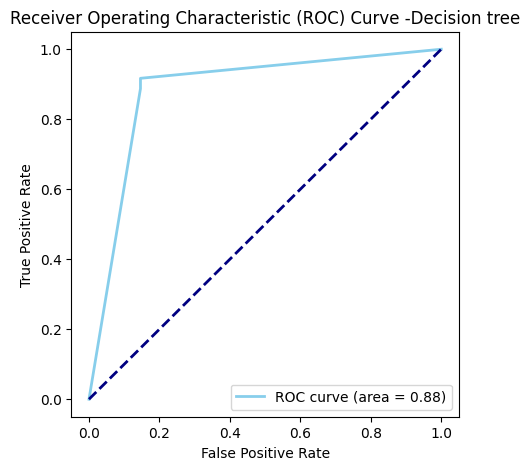

In [3871]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='skyblue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve -Decision tree')
plt.legend(loc='lower right')
plt.show()

### **Varying Thresholds in ROC Curve Analysis for Decision tree classifier:**

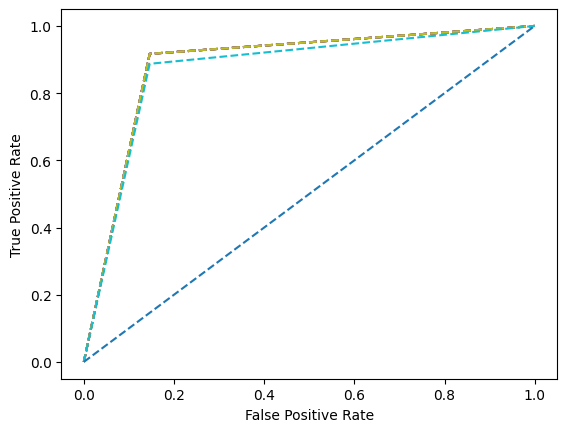

In [3872]:
for threshold in np.arange(0, 1.1, 0.1):
    y_pred_threshold2 = (y_prob_dt > threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold2)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'Threshold = {threshold:.1f} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Hyperparameter Tuning for XGBoost Classifier:**

In [3873]:
xgb = XGBClassifier(random_state=10)

In [3874]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],

}

In [3875]:
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train_selected, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=10, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [3876]:
print("Best Hyperparameters:", grid_search_xgb.best_params_)


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}


In [3877]:
best_xgb_model = XGBClassifier(**grid_search_xgb.best_params_, random_state=10)
best_xgb_model.fit(x_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [3878]:
y_pred_xgb = best_xgb_model.predict(x_test_selected)

### **Various evaluation metrics after hyperparameter tuning for XGBoost classifier.**

In [3879]:
accuracy_best3 = accuracy_score(y_test, y_pred_xgb)
precision_best3 = precision_score(y_test,y_pred_xgb)
recall_best3 = recall_score(y_test,y_pred_xgb)
f1_best3 = f1_score(y_test,y_pred_xgb)
roc_auc_best3 = roc_auc_score(y_test,y_pred_xgb)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best3}")
print(f"Precision after Hyperparameter Tuning: {precision_best3}")
print(f"Recall after Hyperparameter Tuning: {recall_best3}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best3}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best3}")

Accuracy after Hyperparameter Tuning: 0.9314868804664723
Precision after Hyperparameter Tuning: 0.9341317365269461
Recall after Hyperparameter Tuning: 0.9258160237388724
F1-Score after Hyperparameter Tuning: 0.9299552906110283
ROC AUC Score after Hyperparameter Tuning: 0.9313893872276023


### **Confusion Matrix for XGBoost classifier (Hyperparameter Tuning):**

In [3880]:
cm = confusion_matrix(y_test, y_pred_xgb)

print("Confusion Matrix for XGBoost clasifier:")
print(f"\n{'':<12} {'Predicted 0':<12} {'Predicted 1':<12}")
print(f"{'Actual 0':<12} {cm[0, 0]:<12} {cm[0, 1]:<12}")
print(f"{'Actual 1':<12} {cm[1, 0]:<12} {cm[1, 1]:<12}")

Confusion Matrix for XGBoost clasifier:

             Predicted 0  Predicted 1 
Actual 0     327          22          
Actual 1     25           312         


### **Classification Report for XGBoost Classifier(Hyperparameter Tuning):**

In [3881]:
print("Classification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       349
           1       0.93      0.93      0.93       337

    accuracy                           0.93       686
   macro avg       0.93      0.93      0.93       686
weighted avg       0.93      0.93      0.93       686



### **Receiver Operating Characteristic (ROC) Curve for XGBoost classifier(Hyperparameter Tuning):**

In [3882]:
y_prob_xgb =best_xgb_model.predict_proba(x_test_selected)[:, 1]
threshold = 0.5
pred_rf = (y_prob_xgb > threshold).astype(int)

In [3883]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

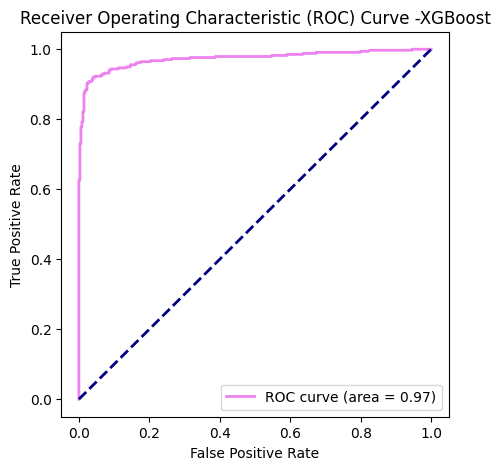

In [3884]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='violet', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve -XGBoost')
plt.legend(loc='lower right')
plt.show()

### **Varying Thresholds in ROC Curve Analysis for XGBoost classifier:**

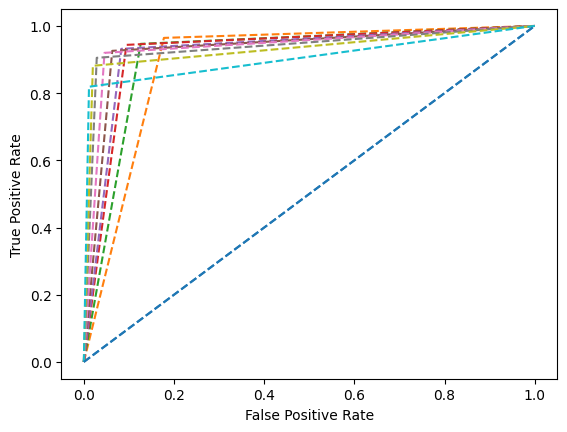

In [3885]:
for threshold in np.arange(0, 1.1, 0.1):
    y_pred_threshold3 = (y_prob_xgb > threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold3)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'Threshold = {threshold:.1f} (AUC = {roc_auc:.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Hyperparameter Tuning for KNN Classifier:**

In [3886]:

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}

In [3887]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [3888]:
print("Best Hyperparameters:", grid_search_knn.best_params_)

Best Hyperparameters: {'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [3889]:
best_knn_model = KNeighborsClassifier(**grid_search_knn.best_params_)
best_knn_model.fit(x_train_selected, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3, p=1, weights='distance')

In [3890]:
y_pred_knn = best_knn_model.predict(x_test_selected)

### **Various evaluation metrics after hyperparameter tuning for KNN classifier.**

In [3891]:
accuracy_best4 = accuracy_score(y_test, y_pred_knn)
precision_best4 = precision_score(y_test,y_pred_knn)
recall_best4 = recall_score(y_test,y_pred_knn)
f1_best4 = f1_score(y_test,y_pred_knn)
roc_auc_best4 = roc_auc_score(y_test,y_pred_knn)

print(f"Accuracy after Hyperparameter Tuning: {accuracy_best4}")
print(f"Precision after Hyperparameter Tuning: {precision_best4}")
print(f"Recall after Hyperparameter Tuning: {recall_best4}")
print(f"F1-Score after Hyperparameter Tuning: {f1_best4}")
print(f"ROC AUC Score after Hyperparameter Tuning: {roc_auc_best4}")

Accuracy after Hyperparameter Tuning: 0.8775510204081632
Precision after Hyperparameter Tuning: 0.8446866485013624
Recall after Hyperparameter Tuning: 0.9198813056379822
F1-Score after Hyperparameter Tuning: 0.8806818181818181
ROC AUC Score after Hyperparameter Tuning: 0.8782787617015126


### **Confusion Matrix for KNN classifier (Hyperparameter Tuning):**

In [3892]:
cm = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix for KNN clasifier:")
print(f"\n{'':<12} {'Predicted 0':<12} {'Predicted 1':<12}")
print(f"{'Actual 0':<12} {cm[0, 0]:<12} {cm[0, 1]:<12}")
print(f"{'Actual 1':<12} {cm[1, 0]:<12} {cm[1, 1]:<12}")

Confusion Matrix for KNN clasifier:

             Predicted 0  Predicted 1 
Actual 0     292          57          
Actual 1     27           310         


### **Classification Report for KNN Classifier(Hyperparameter Tuning):**

In [3893]:
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.92      0.84      0.87       349
           1       0.84      0.92      0.88       337

    accuracy                           0.88       686
   macro avg       0.88      0.88      0.88       686
weighted avg       0.88      0.88      0.88       686



### **Receiver Operating Characteristic (ROC) Curve for KNN classifier(Hyperparameter Tuning):**

In [3894]:
y_prob_knn =best_knn_model.predict_proba(x_test_selected)[:, 1]
threshold = 0.5
pred_knn = (y_prob_knn > threshold).astype(int)

In [3895]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)

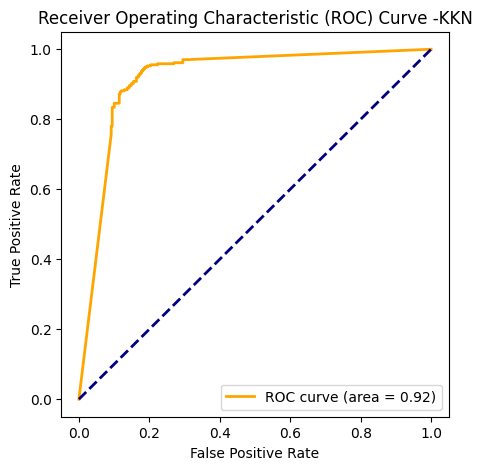

In [3896]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve -KKN')
plt.legend(loc='lower right')
plt.show()

### **Varying Thresholds in ROC Curve Analysis for KNN classifier:**

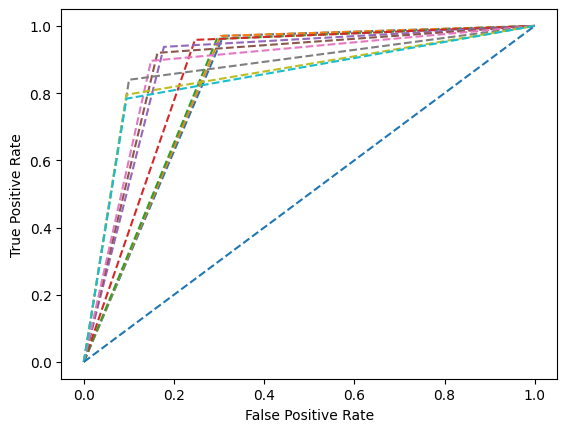

In [3897]:

for threshold in np.arange(0, 1.1, 0.1):
    y_pred_threshold4 = (y_prob_knn > threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold4)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'Threshold = {threshold:.1f} (AUC = {roc_auc:.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Performance Metrics Comparison After Hyperparameter Tuning**

In [3898]:

data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Random forest': [accuracy_best1, precision_best1, recall_best1, f1_best1, roc_auc_best1],
    'Decision tree': [accuracy_best2, precision_best2, recall_best2, f1_best2, roc_auc_best2],
    'XGBoost': [accuracy_best3, precision_best3, recall_best3, f1_best3, roc_auc_best3],
    'KNN': [accuracy_best4, precision_best4, recall_best4, f1_best4, roc_auc_best4]
}


In [3899]:
metrics_df = pd.DataFrame(data).set_index('Metric')
print(metrics_df)

           Random forest  Decision tree   XGBoost       KNN
Metric                                                     
Accuracy        0.928571       0.884840  0.931487  0.877551
Precision       0.933735       0.858333  0.934132  0.844687
Recall          0.919881       0.916914  0.925816  0.919881
F1-Score        0.926756       0.886657  0.929955  0.880682
ROC AUC         0.928422       0.885391  0.931389  0.878279


# **Comparing the Accuracies of All Algorithms After Hyperparameter Tuning**

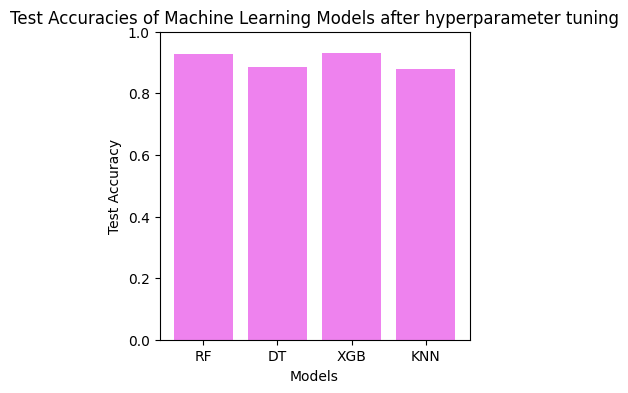

In [3900]:
data1 = {
    'Models': ['RF','DT','XGB','KNN'],
    'Test Accuracy': [0.928571,0.884840,0.931487,0.877551]
}
dfmh = pd.DataFrame(data1)
plt.figure(figsize=(4,4))
plt.bar(dfmh['Models'], dfmh['Test Accuracy'], color='Violet')
plt.title('Test Accuracies of Machine Learning Models after hyperparameter tuning')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.show()

The above bar graph illustrates the accuracies of various machine learning algorithms after hyperparameter tuning. Each bar represents the accuracy achieved by a specific algorithm, providing insights into the performance improvements resulting from hyperparameter optimization.

#**Conclusion:**  

 After a thorough review, XGBoost performed impressively, achieving a recall of 94% for 'approved' cases and 93% for 'not approved' cases in credit card approvals (based on the classification report) with an overall accuracy score of 93.15%. This indicates its proficiency in recognizing the correct cases and minimizing errors. While Random Forest showed a similar accuracy, XGBoost exhibited a slight edge in capturing all actual credit card approval instances. It nailed positive predictions with a precision of 93.41% and performs exceptionally well with a 92.99% F1-score, striking a good balance between precision and recall. XGBoost did really well, scoring 93.14% in telling how good it is at deciding which credit card applications are good or not-so-good. For simplicity and ensuring the capture of all credit card approvals, XGBoost emerges as the preferred choice over Random Forest. It proves to be a robust and reliable model for predicting credit card approvals, providing a careful and well-thought-out way to make positive predictions.

*  Importantly, KNN and Decision Tree are less effective when compared to Random Forest and XGBoost in predicting credit card approvals. After considering all these aspects, I prefer XGBoost as my final model for the analysis.



